# Case Study on Probability for Data Science

Problem Statement:<br>
To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.<br>
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)<br>
Also, if some data pre-processing is necessary do that as well.

In [1]:
#importing pandas,numply,matplotlib.pyplot,seaborn libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset to the python environment
data=pd.read_csv('mushrooms.csv')
#displaying  top 5  rows of the dataset
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [3]:
#To know data types of each columns and checking for null values in the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

About our Dataset:

- we have entries of 8124 mushrooms
- There are 23 columns/features/details
- All columns are categorical
- Also there are no empty/NaN values present in the dataset 

In [4]:
# to know  statistical summary of integer datatype columns 
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
#Check for the null values present in each column of  dataset using 'isnull().sum()' function
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Find:

No Null values

### Data Visualisation

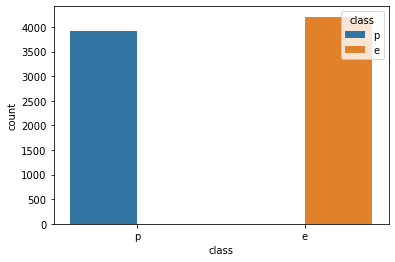

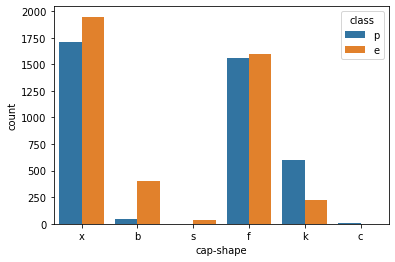

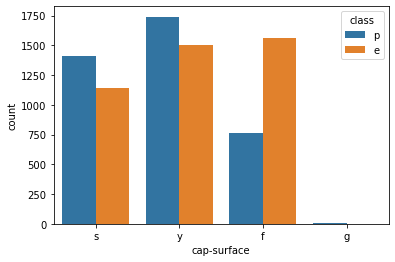

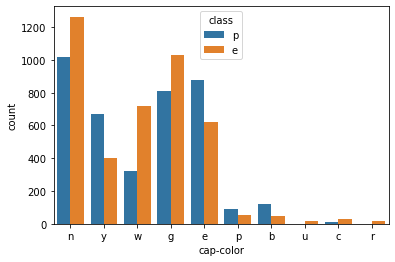

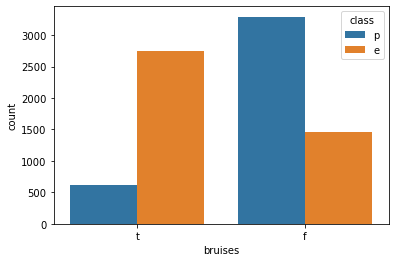

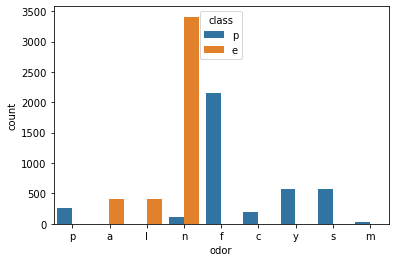

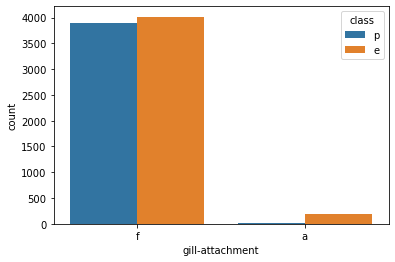

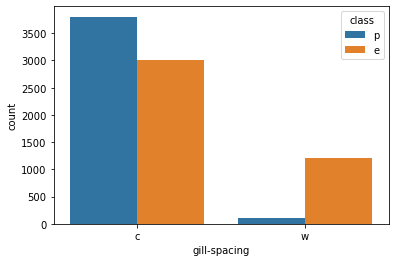

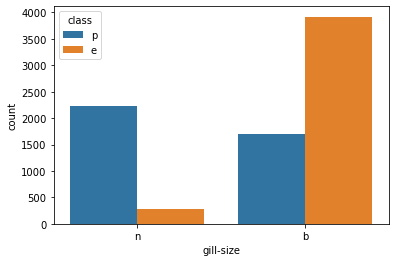

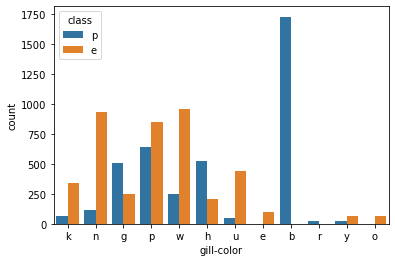

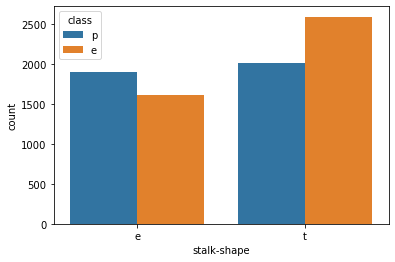

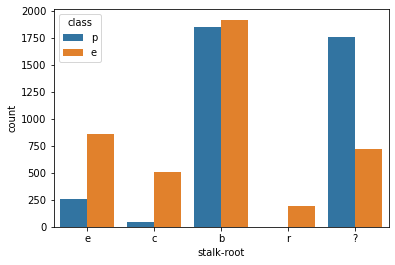

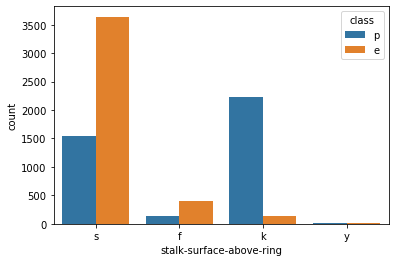

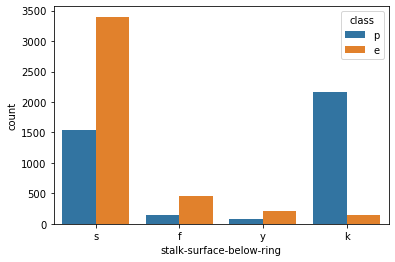

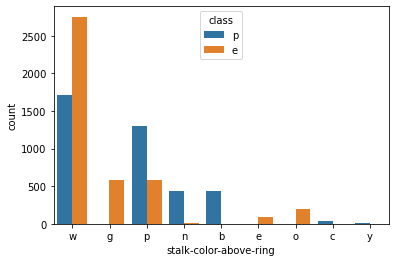

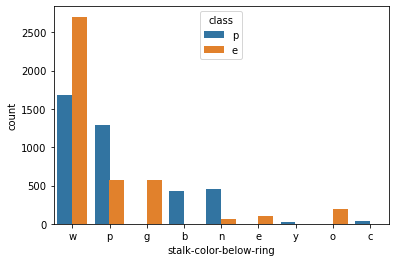

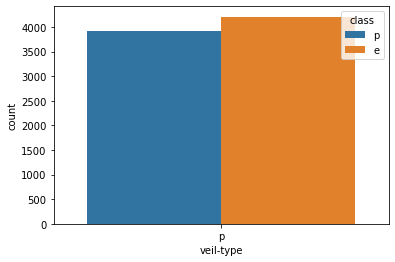

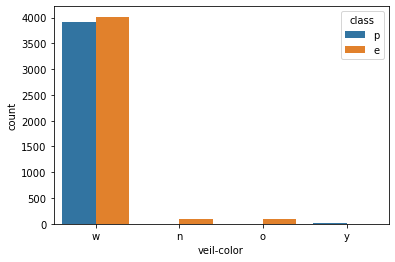

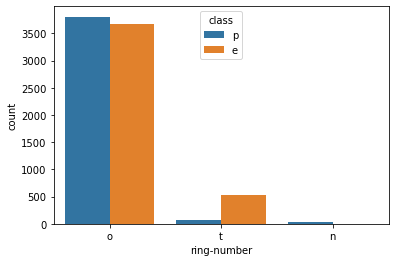

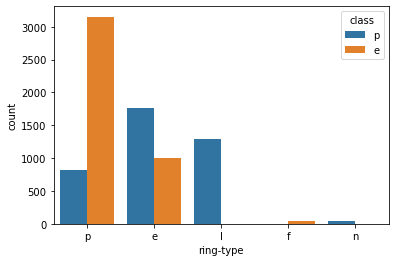

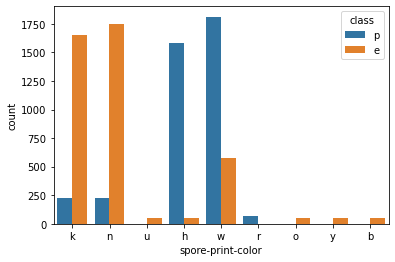

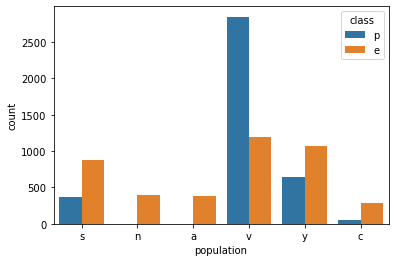

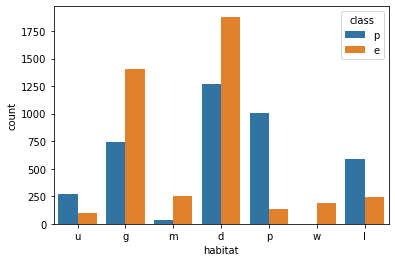

In [7]:
# countplot of every variable with hue = class/target
for i, col in enumerate(data.columns):
    plt.figure(i)
    sns_plot = sns.countplot(x=col, hue='class', data=data)
    sns_plot.figure.savefig("{} class countplot.png".format(col))

Insights:

our data has a balanced target variable, between the poisonous and edible mushrooms.

### Pre-processing

In [8]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

Insights:

we have two classifications. Either the mushroom is poisonous or edible <br>
we can see that the dataset is balanced.

In [9]:
unique_data= [] 
for x in data.columns.tolist():
    num= data[x].nunique()
    value= data[x].unique()
    unique_data.append(pd.Series({'col_name' : x,
               'num_unique' : num,
               'value_unique': value}))
uniques = pd.concat(unique_data,axis=1).T.set_index('col_name')
uniques

,num_unique,value_unique
col_name,,
class,2,"[p, e]"
cap-shape,6,"[x, b, s, f, k, c]"
cap-surface,4,"[s, y, f, g]"
cap-color,10,"[n, y, w, g, e, p, b, u, c, r]"
bruises,2,"[t, f]"
odor,9,"[p, a, l, n, f, c, y, s, m]"
gill-attachment,2,"[f, a]"
gill-spacing,2,"[c, w]"
gill-size,2,"[n, b]"


In [10]:
data["stalk-root"].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

Insights:

There are 2480 missing values represented as '?'  in "stalk-root" column <br>
Over 30% of the information in the ‘stalk-root’ column are missing. decide to fill these in with the current mode of the column, which is ‘b’.

"veil-type" has only one value,meaning that it will contribute nothing to our classification models.so it can be removed from feature set


In [11]:
# As Stalk root is categorical variable, so Filling 2480 '?' values in stalk-root with mode value 'b'
data["stalk-root"]= data["stalk-root"].str.replace('?','b')

In [12]:
data["stalk-root"].value_counts()

b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

### Encoding

our dataset is full of categorical data. We need to convert these categorical values into numerical representatives. There are two ways to do this.

Label Encoding:  We can't apply this method on a columns has more than two different values, because this method may cause a hierarchy between values in a column. So, this may cause incorrect classification.

One-Hot Encoding: In this method, each distinct values in a column transform into a column. Unlike label encoding, there is no trouble in terms of hierarchy. As dataset grows dimensionally, this method may cause low running performance.

Therefore, we will only apply Label Encoding to those features with a binary set of values: ie(class)

In [13]:
# feature columns ,also droping veil-type feature
x=data.drop(['class', 'veil-type'],axis=1)
#  target column 'Class'
y=data['class']

In [14]:
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()

y = le_encoder.fit_transform(y) # Label Encoding for class.

x = pd.get_dummies(x) # One-Hot Encoding for attributes. There are columns has more than two unique values. So, for encoding I use One-Hot Encoding.


x

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0

Insights:

By performing one-hot encoding, dramatically expanded the feature columns from 22 to 115. 

In [15]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y,test_size=0.25)

In [16]:
print(" shape of x train",x_train.shape)
print(" shape of y train",y_train.shape)
print(" shape of x test",x_test.shape)
print(" shape of y test",y_test.shape)

 shape of x train (6093, 115)
 shape of y train (6093,)
 shape of x test (2031, 115)
 shape of y test (2031,)


## Modelling (LogisticRegression,Gradient Boosting,kNN,DecisionTree ,RandomForest)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, recall_score, accuracy_score, roc_auc_score, precision_score, auc, roc_curve,classification_report,confusion_matrix

In [18]:
model = {
    "Logistic Regressor" : LogisticRegression(),
    "Gradient Boosting" : GradientBoostingClassifier(),    
    "KNeighbor Classifier" : KNeighborsClassifier(n_neighbors=4),      
    "DecisionTree Classifier" : DecisionTreeClassifier(),     
    "RandomForest Classifier" : RandomForestClassifier()
        }

In [19]:
scores = []
prob_score = {}
for mod in model:
    classifier = model[mod]
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)

    scores.append([
        mod,
        accuracy_score(y_test, pred),
        f1_score(y_test, pred, average='weighted'),
        precision_score(y_test, pred, average='weighted'),        
        recall_score(y_test, pred, average='weighted'),   
       
    ])

### Performance Score of each models

In [20]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

scores_df  = pd.DataFrame(scores)
index_model = {count: s for count, s in enumerate(scores_df[0])}
col = {count+1: s for count, s in enumerate(['Accuracy','F1 Score','Precision','Recall'])}
scores_df = scores_df.drop(0, axis=1)
scores_df = scores_df.rename(columns=col, index=index_model)
scores_df.style.apply(highlight_max)

,Accuracy,F1 Score,Precision,Recall
Logistic Regressor,0.999508,0.999508,0.999508,0.999508
Gradient Boosting,0.999015,0.999015,0.999017,0.999015
KNeighbor Classifier,1.000000,1.000000,1.000000,1.000000
DecisionTree Classifier,1.000000,1.000000,1.000000,1.000000
RandomForest Classifier,1.000000,1.000000,1.000000,1.000000


### Cross Validation scores of each models

In [21]:
for mod in model:
    classifier = model[mod]
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)
    scores = cross_val_score(classifier, x_train, y_train, cv=10)
    print(classifier,"'s-Average Cross Validation score :{}".format(np.mean(scores)))  

LogisticRegression() 's-Average Cross Validation score :0.9998357963875206
GradientBoostingClassifier() 's-Average Cross Validation score :0.9996715927750411
KNeighborsClassifier(n_neighbors=4) 's-Average Cross Validation score :1.0
DecisionTreeClassifier() 's-Average Cross Validation score :0.9998357963875206
RandomForestClassifier() 's-Average Cross Validation score :1.0


In [22]:
names = ['LogisticRegression','GradientBoosting', 'KNN','DecisionTree', 'RandomForestClassifier' ]
scores = [0.9998, 0.9996, 1.0, 0.9998, 1.0]
sc = pd.DataFrame(index=names)
sc['Cross Validation scores'] = scores
sc

,Cross Validation scores
LogisticRegression,0.9998
GradientBoosting,0.9996
KNN,1.0000
DecisionTree,0.9998
RandomForestClassifier,1.0000


### Confusion Matrix of each models

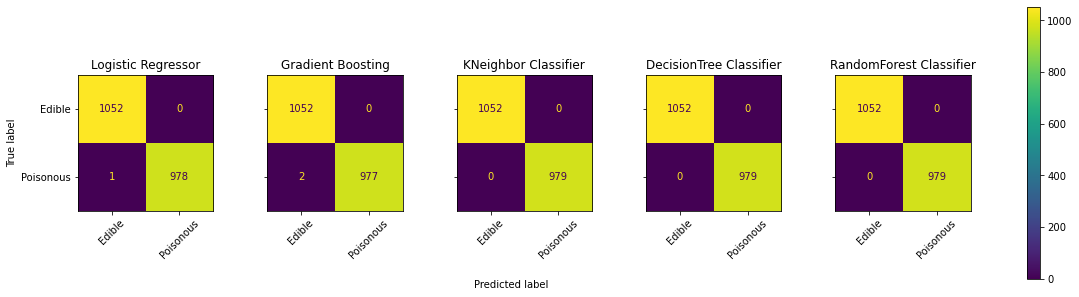

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



f, axes = plt.subplots(1, 5, figsize=(20, 5), sharey='row')

for i, (key, model) in enumerate(model.items()):
    y_pred = model.fit(x_train, y_train).predict(x_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=["Edible", "Poisonous"])
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()


## Naive-Bayes (Gaussian,Bernoulli & Multinomial) modelling

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

model2 = {
    "Gaussian Naive-Bayes" : GaussianNB(),
    "bernouli naive bayes" : BernoulliNB()   ,
    "Multinomial Naive Bayes":MultinomialNB()
        }

In [25]:
scores = []
prob_score = {}
for mod in model2:
    classifier = model2[mod]
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)
    
    scores.append([
        mod,
        accuracy_score(y_test, pred),
        f1_score(y_test, pred, average='weighted'),
        precision_score(y_test, pred, average='weighted'),        
        recall_score(y_test, pred, average='weighted'),
        #roc,
       
    ])

### Performance Score of each models

In [26]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

scores_df  = pd.DataFrame(scores)
index_model = {count: s for count, s in enumerate(scores_df[0])}
col = {count+1: s for count, s in enumerate(['Accuracy','F1 Score','Precision','Recall'])}
scores_df = scores_df.drop(0, axis=1)
scores_df = scores_df.rename(columns=col, index=index_model)
scores_df.style.apply(highlight_max)

,Accuracy,F1 Score,Precision,Recall
Gaussian Naive-Bayes,0.954702,0.954688,0.958267,0.954702
bernouli naive bayes,0.939439,0.939211,0.942983,0.939439
Multinomial Naive Bayes,0.953225,0.953098,0.955602,0.953225


### Cross Validation scores of each models

In [27]:
for mod in model2:
    classifier = model2[mod]
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)
    scores = cross_val_score(classifier, x_train, y_train, cv=10)
    print(classifier,"'s-Average Cross Validation score :{}".format(np.mean(scores)))  

GaussianNB() 's-Average Cross Validation score :0.9483003580177124
BernoulliNB() 's-Average Cross Validation score :0.9394387466688201
MultinomialNB() 's-Average Cross Validation score :0.9505989394061751


In [28]:
names = ['Gaussian Naive-Bayes', 'Bernouli naive bayes','Multinomial Naive Bayes']

cv_scores = [0.9483, 0.9394,0.9505]
sc = pd.DataFrame(index=names)


sc['Cross Validation scores'] = cv_scores
sc

,Cross Validation scores
Gaussian Naive-Bayes,0.9483
Bernouli naive bayes,0.9394
Multinomial Naive Bayes,0.9505


### Confusion Matrix of each models

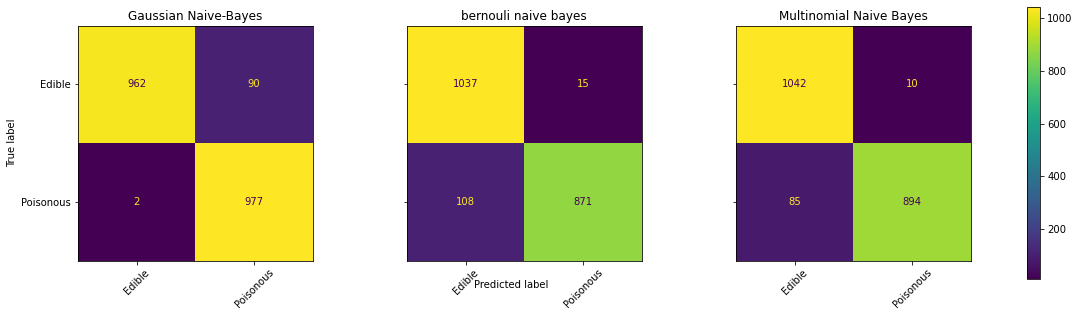

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


f, axes = plt.subplots(1, 3, figsize=(20, 5), sharey='row')

for i, (key, model2) in enumerate(model2.items()):
    y_pred = model2.fit(x_train, y_train).predict(x_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=["Edible", "Poisonous"])
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()

<div class="alert alert-block alert-info"><b>Summary:</b><br>     
  
- We have an almost perfectly balanced dataset with a sufficient amount of data to create an model of 100% accuracy without hypertuning any parametes or scaling or outlier removal.<br> <br>     
    
- When modelling, <u>kNN,RandomForest</u> models gave accuracy  & cross vlaidation score of 1.000.   
    also predicted 100% output in conufsion matrix <br>  <br>      
- Remaining models also gave accuracy  & cross vlaidation score near to 1.000<br>  <br>        
    
- In Naive-Bayes models ,Gaussian Naive-Bayes 	 gave highest accuracy & cross vlaidation score.<br>
  In the conufsion matrix also ,Naive-Bayes models correctly predicted 90% of the output
 
    
    
</div>

Submitted by-

`Kevin M
 DSA Norka B3 2021`

--------------